# MATH 189 Final Project
## Group B12: Daniel Zhu, Jennifer Zwiebel, Sophia Zhou, Sarah Yu
Our data was obtained from the UC Irvine Machine Learning Repository Online News Repository dataset. This data comes from articles published by Mashable, a digital media site. The dataset includes the dependent variable `shares` and 60 other columns with possible covariates that measure a range of metrics such as keywords, number of visual media, day of the week published, and much more. In total, this dataset contains 39,644 observations. The dataset can be seen below:

In [1]:
# Import packages
import numpy as np
import scipy
from scipy import stats as stats
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import itertools
pd.options.mode.chained_assignment = None


import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
from statsmodels.tsa.stattools import acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

<b><b>

### Data Cleaning and Initial Model

In [2]:
#pd.set_options('display.max_columns', None)
news = pd.read_csv("OnlineNewsPopularity.csv")
news

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


Our first step in our analysis was to clean the data. We removed the spaces before the names of the columns. Additionally, we put the weekdays and data channels into their own respective variables.

In [3]:
# List of weekday columns
weekday_columns = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 
                   'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 
                   'weekday_is_sunday']

# Dictionary to map column names to weekday names
weekday_map = {
    'weekday_is_monday': 'Monday',
    'weekday_is_tuesday': 'Tuesday',
    'weekday_is_wednesday': 'Wednesday',
    'weekday_is_thursday': 'Thursday',
    'weekday_is_friday': 'Friday',
    'weekday_is_saturday': 'Saturday',
    'weekday_is_sunday': 'Sunday'
}

# Function to determine the weekday
def get_weekday(row):
    for col in weekday_columns:
        if row[col] == 1:
            return weekday_map[col]
    return None

# Strip any leading or trailing spaces from the column names
news.columns = news.columns.str.strip()

# Apply the function to create the new column again
news['weekday'] = news.apply(get_weekday, axis=1)

In [4]:
data_channel_columns = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
                        'data_channel_is_bus', 'data_channel_is_socmed', 
                        'data_channel_is_tech', 'data_channel_is_world']

# Dictionary to map column names to data channel names
data_channel_map = {
    'data_channel_is_lifestyle': 'Lifestyle',
    'data_channel_is_entertainment': 'Entertainment',
    'data_channel_is_bus': 'Business',
    'data_channel_is_socmed': 'Social Media',
    'data_channel_is_tech': 'Tech',
    'data_channel_is_world': 'World'
}

# Function to determine the data channel
def get_data_channel(row):
    for col in data_channel_columns:
        if row[col] == 1:
            return data_channel_map[col]
    return np.nan

# Apply the function to create the new column
news['data_channel'] = news.apply(get_data_channel, axis=1)
cleaned_news = news.drop(columns = data_channel_columns)
cleaned_news = cleaned_news.drop(columns = weekday_columns)
cleaned_news = cleaned_news.drop(columns = ['url', 'timedelta'])
cleaned_news

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,weekday,data_channel
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Monday,Entertainment
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Monday,Business
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Monday,Business
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Monday,Entertainment
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Monday,Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,Wednesday,Tech
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,Wednesday,Social Media
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,Wednesday,NaN
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,Wednesday,World


Our **full linear model** with all the variables is shown below. As you can see the R-squared value is very low. However, this is mitigated by our very small p-value for our F statistic, which indicates that the model is indeed a good fit for the data.

In [5]:
response = 'shares'
variables = cleaned_news.columns.drop(response)

full_formula = response + ' ~ '  + ' + '.join(variables)

full_model = smf.ols(full_formula, data = cleaned_news).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     13.68
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          1.31e-121
Time:                        16:32:22   Log-Likelihood:            -3.5399e+05
No. Observations:               33510   AIC:                         7.081e+05
Df Residuals:                   33454   BIC:                         7.086e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

<b><b>

### Histograms of dependent variable 'shares'

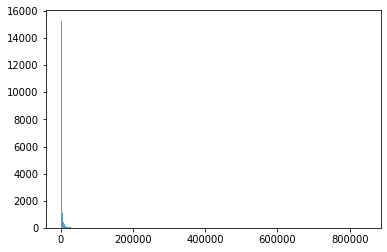

In [6]:
plt.hist(news['shares'], bins = 1000, alpha = 0.75)
plt.show()

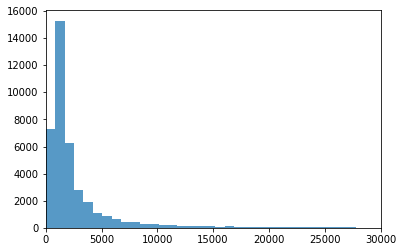

In [7]:
plt.hist(news['shares'], bins = 1000, alpha = 0.75)
plt.xlim([0, 30000])
plt.show()

<b><b>

### Variable selection

Next, we used the **lasso method** to select the most relevant variables from this dataset. First, we needed to figure out which penalty parameter to use. To figure this out, we plotted the variables under lasso model against different penalty parameters, as seen below:


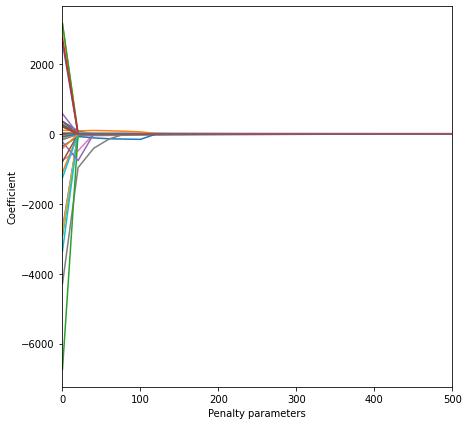

In [8]:
regularization_parameters = np.linspace(0, 1000, 51)
coefficients = []

for penalty_param in regularization_parameters:
    lasso_model = smf.ols(full_formula, data=cleaned_news).\
                fit_regularized(method='elastic_net', alpha=penalty_param, L1_wt=1.0)
    coefficients.append(lasso_model.params[1:])

coefficients = pd.DataFrame(coefficients, index=regularization_parameters)

fig, ax = plt.subplots(figsize=(7, 7))
for column in coefficients.columns:
    ax.plot(regularization_parameters, coefficients[column], label=column)
ax.set_xlabel('Penalty parameters')
ax.set_ylabel('Coefficient')

ax.set_xlim([-1, 500])

plt.show()

# Code source: week-9.ipynb

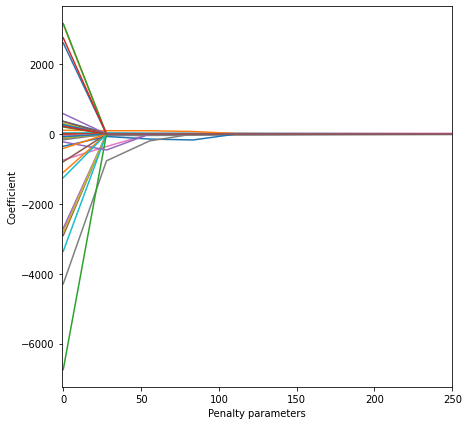

In [9]:
regularization_parameters = np.linspace(0, 250, 10)
coefficients = []

for penalty_param in regularization_parameters:
    lasso_model = smf.ols(full_formula, data=cleaned_news).\
                fit_regularized(method='elastic_net', alpha=penalty_param, L1_wt=1.0)
    coefficients.append(lasso_model.params[1:])

coefficients = pd.DataFrame(coefficients, index=regularization_parameters)

fig, ax = plt.subplots(figsize=(7, 7))
for column in coefficients.columns:
    ax.plot(regularization_parameters, coefficients[column], label=column)
ax.set_xlabel('Penalty parameters')
ax.set_ylabel('Coefficient')

ax.set_xlim([-1, 250])

plt.show()

# Code source: week-9.ipynb

Based on this, we chose a penalty parameter of 150. After using the lasso method with this penalty parameter, we were left with 16 variables:

In [10]:
penalty_param = 150
lasso_model = smf.ols(full_formula, data=cleaned_news).\
                fit_regularized(method='elastic_net', alpha=penalty_param, L1_wt=1.0)
lasso_vars = lasso_model.params[lasso_model.params != 0].index[2:]
lasso_formula = response + ' ~ '  + ' + '.join(lasso_vars)
lasso_model = smf.ols(lasso_formula, data=cleaned_news).\
                fit_regularized(method='elastic_net', alpha=penalty_param, L1_wt=1.0)
print(lasso_vars)

Index(['num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess'],
      dtype='object')


<b><b>

### Multicollinearity

The next step was to check for multicollinearity between these selected variables. To do this, we looked at the VIFs of all of the selected variables. We can also visualize this with a heatmap of the correlation coefficients.

In [11]:
exog = lasso_model.model.exog
names = lasso_model.params.index
for i in range(1, exog.shape[1]):
   print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

# Code source: week-7.ipynb

VIF: num_self_hrefs:  1.160
VIF: num_imgs:  1.132
VIF: num_videos:  1.064
VIF: num_keywords:  1.381
VIF: kw_min_min:  3.817
VIF: kw_max_min:  10.973
VIF: kw_avg_min:  10.622
VIF: kw_min_max:  1.347
VIF: kw_max_max:  4.300
VIF: kw_avg_max:  2.962
VIF: kw_min_avg:  2.040
VIF: kw_max_avg:  5.849
VIF: kw_avg_avg:  7.325
VIF: self_reference_min_shares:  6.596
VIF: self_reference_max_shares:  8.370
VIF: self_reference_avg_sharess:  19.048


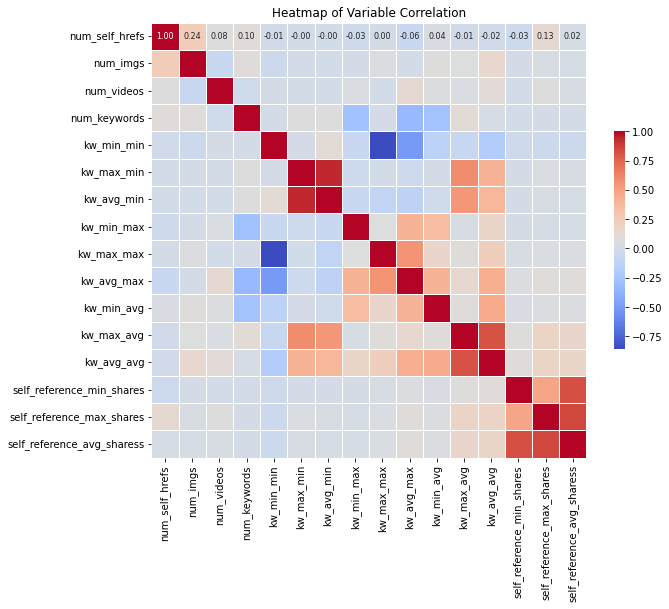

In [12]:
correlation_matrix = cleaned_news[lasso_vars].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 8})

plt.title('Heatmap of Variable Correlation')
plt.show()

# Code source: week-7.ipynb

In [13]:
final_vars = lasso_vars.drop(['self_reference_avg_sharess', 'kw_avg_avg', 'kw_max_min'])

initial_model = smf.ols( f'{response} ~ {"+".join(final_vars)}', cleaned_news).fit()

Once we removed variables that had high multicollinearity, we were left with 13 variables.

In [14]:
exog = initial_model.model.exog
names = initial_model.params.index
for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: num_self_hrefs:  1.122
VIF: num_imgs:  1.091
VIF: num_videos:  1.056
VIF: num_keywords:  1.297
VIF: kw_min_min:  3.793
VIF: kw_avg_min:  1.543
VIF: kw_min_max:  1.336
VIF: kw_max_max:  4.295
VIF: kw_avg_max:  2.372
VIF: kw_min_avg:  1.309
VIF: kw_max_avg:  1.645
VIF: self_reference_min_shares:  1.319
VIF: self_reference_max_shares:  1.396


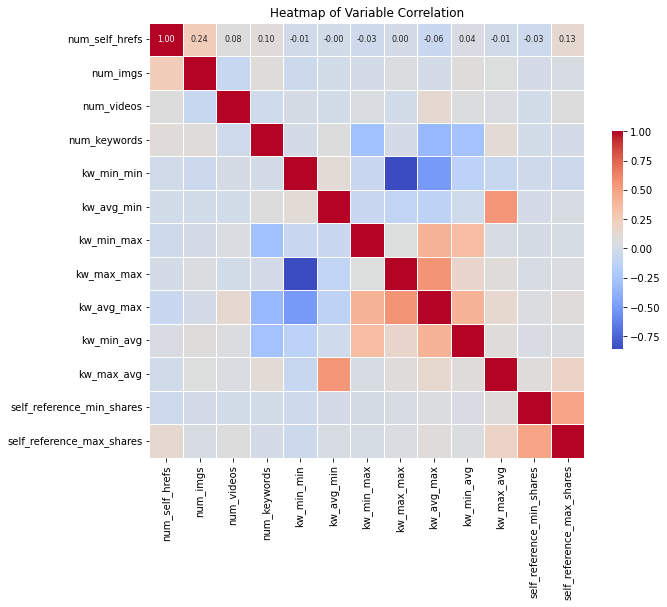

In [15]:
correlation_matrix = cleaned_news[final_vars].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 8})

plt.title('Heatmap of Variable Correlation')
plt.show()

These 13 variables were our final variables that we included in the model. Before we made the linear model with these variables, we needed to check the assumptions for running a linear regression. Our work in checking the assumptions can be seen below: 

In [16]:
# Helper function
def standardize(x):
    return(x - x.mean()) / x.std()

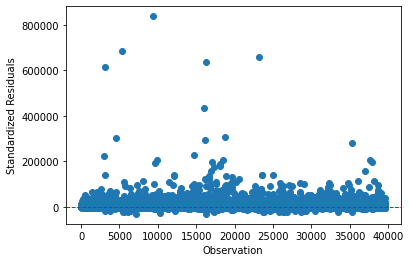

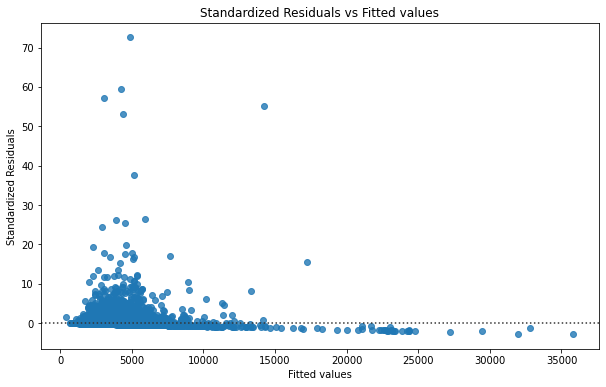

<Figure size 720x432 with 0 Axes>

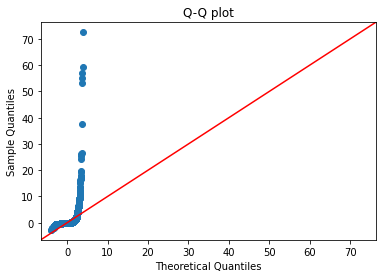

In [17]:
fitted_values = initial_model.fittedvalues
residuals = initial_model.resid
standardized_residuals = standardize(residuals)

# Independence
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, linestyle='--', color='red', lw=1)
plt.xlabel('Observation')
plt.ylabel('Standardized Residuals')

# Linearity: Residuals vs Fitted values plot
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_values, y=standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Fitted values')
plt.show()

# Normality: Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot')
plt.show()

In [18]:
p_values = het_breuschpagan(initial_model.resid, initial_model.model.exog)[3]
print(p_values)

3.276866798893966e-08


As you can see, the assumptions were way off. So, we had to do a log transform on our data.

### Log-transformed (final) model

In [19]:
logistic_model = smf.ols(f'np.log({response}) ~ {"+".join(final_vars)}', cleaned_news).fit()
print(logistic_model.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(shares)   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:35:10   Log-Likelihood:                -52460.
No. Observations:               39644   AIC:                         1.049e+05
Df Residuals:                   39630   BIC:                         1.051e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<b><b>

Next, we checked the assumptions for this transformed data.

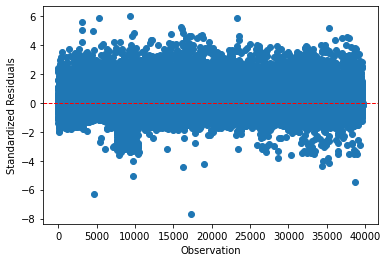

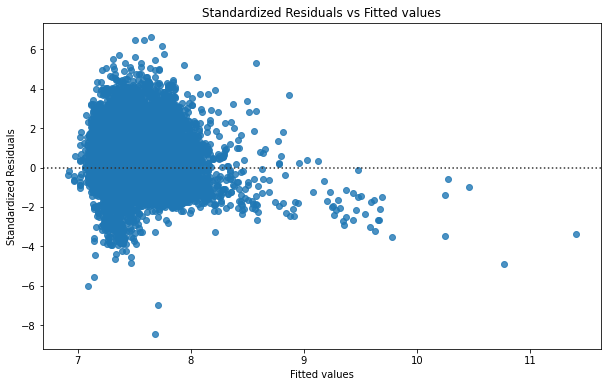

<Figure size 720x432 with 0 Axes>

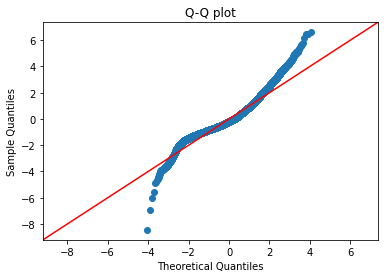

In [20]:
fitted_values = logistic_model.fittedvalues
residuals = logistic_model.resid
standardized_residuals = standardize(residuals)

# Independence
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, linestyle='--', color='red', lw=1)
plt.xlabel('Observation')
plt.ylabel('Standardized Residuals')

# Linearity: Residuals vs Fitted values plot
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_values, y=standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Fitted values')
plt.show()

# Normality: Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot')
plt.show()

In [21]:
p_values2 = het_breuschpagan(logistic_model.resid, logistic_model.model.exog)[3]
print(p_values2)

9.796323034801157e-163


<b><b>

### Log-tranformed model with interaction terms

Lastly, we added all combinations of 2 of our selected variables (interaction terms) to our model for the logistic regression with our selected variables to improve our model fit.

In [22]:
subsets = []
for i in range(0, len(final_vars) + 1):
    subsets.extend(itertools.combinations(final_vars, i))

interaction_terms = [' : '.join(subset) for subset in subsets if len(subset) == 2]

interaction_formula = f'np.log({response}) ~ {" + ".join(final_vars)} + {" + ".join(interaction_terms)}'

interaction_model = smf.ols(formula = interaction_formula, data = news).fit()

<b><b>

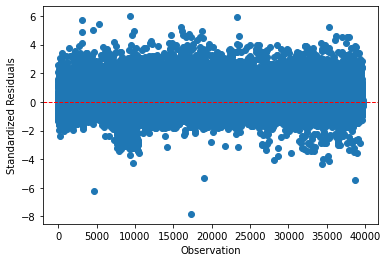

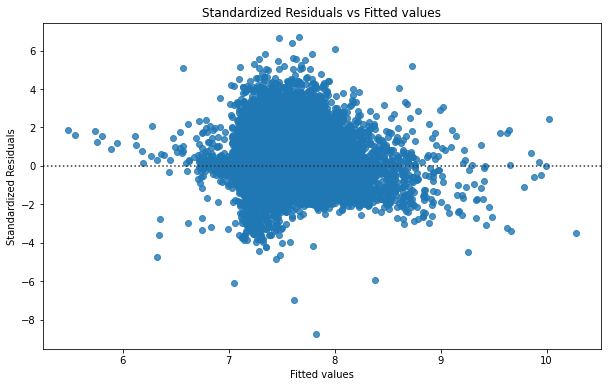

<Figure size 720x432 with 0 Axes>

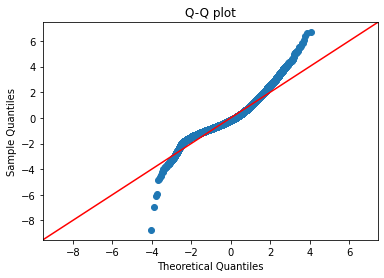

In [23]:
fitted_values = interaction_model.fittedvalues
residuals = interaction_model.resid
standardized_residuals = standardize(residuals)

# Independence
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, linestyle='--', color='red', lw=1)
plt.xlabel('Observation')
plt.ylabel('Standardized Residuals')

# Linearity: Residuals vs Fitted values plot
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_values, y=standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Fitted values')
plt.show()

# Normality: Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot')
plt.show()

##### Het Breuschpagan for Heteroscedasticity

In [24]:
p_values3 = het_breuschpagan(interaction_model.resid, interaction_model.model.exog)[3]
print(p_values3)

5.762279093393602e-122


In [25]:
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(shares)   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     35.41
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:35:14   Log-Likelihood:                -51843.
No. Observations:               39644   AIC:                         1.039e+05
Df Residuals:                   39552   BIC:                         1.047e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

<b>

### Scatter Plots: Relationships between selected variables and shares

In [26]:
predictors = ['num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords', 'kw_min_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares', 'self_reference_max_shares']
new_variables = ['num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords', 'kw_min_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'shares']
new_news = cleaned_news[new_variables]

In [ ]:
n_vars = len(predictors)
n_cols = 2
n_rows = np.ceil(n_vars / n_cols).astype(int)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))
axs = axs.flatten()

for i, var in enumerate(predictors):
    sns.regplot(x=var, y='shares', data=new_news, ax=axs[i],
                line_kws={'color': 'red'})
    axs[i].set_title(f'Scatter plot of shares vs {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('shares')

for ax in axs[len(predictors):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

<b>